# FM-223: Lista 2

Aluno: Vinícius Freitas de Almeida

## Exercício 1

Implementar o mapa de Hénon e reproduzir as Figuras 2.3, 2.16 e 2.17 do livro.

### Mapa de Hénon

O mapa de Hénon é a função parametrizada pelas constantes reais $a,b$ dada por $$  f: \mathbb{R}^2 \mapsto \mathbb{R}^2 \\ f(x,y) = (a - x^2 + by, x)$$

Para reproduzir a figura 2.3, é preciso iterar o mapa de Hénon para $a=1.28$, $b=-0.3$ e $a=1.4$, $b=-0.3$. Além disso, é preciso variar as condições iniciais 
$(x_0,y_0)$ no domínio quadrado $[-2.5,2.5]\times[-2.5,2.5]$.

Nesta implementação em particular, a iteração do mapa de Hénon é feita $n$ vezes por meio de um código em C compilado como a biblioteca dinâmica `libhenon.so`, que é carregada pelo Python por meio do módulo `ctypes`. Para compilar o código em C, basta executar a Makefile na pasta `lib` por meio do comando `make` no terminal.

In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the libhenon shared library
libhenon = ctypes.CDLL('./lib/libhenon.so') 

# Define the function signature
libhenon.iterated_henon_map.argtypes = [ctypes.c_float, ctypes.c_float, ctypes.c_float, ctypes.c_float, ctypes.c_int]
libhenon.iterated_henon_map.restype = ctypes.c_float

def new_vec_i_henon_map(a, b):
    # Defines a Python function that wraps the C function
    # parameterized by a, b
    fn = lambda x,y: libhenon.iterated_henon_map(a, b, x, y, 1000)
    # vectorize with numpy
    return np.vectorize(fn)

In [2]:
# Create a 2D grid of 700x700 points
# (x,y) in [-2.5, 2.5] x [-2.5, 2.5]
x = np.linspace(-2.5, 2.5, 700)
y = np.linspace(-2.5, 2.5, 700)
X, Y = np.meshgrid(x, y)
# left plot
f = new_vec_i_henon_map(1.28, -0.3)
Z0 = f(X, Y)
# right plot
g = new_vec_i_henon_map(1.4, -0.3)
Z1 = g(X, Y)

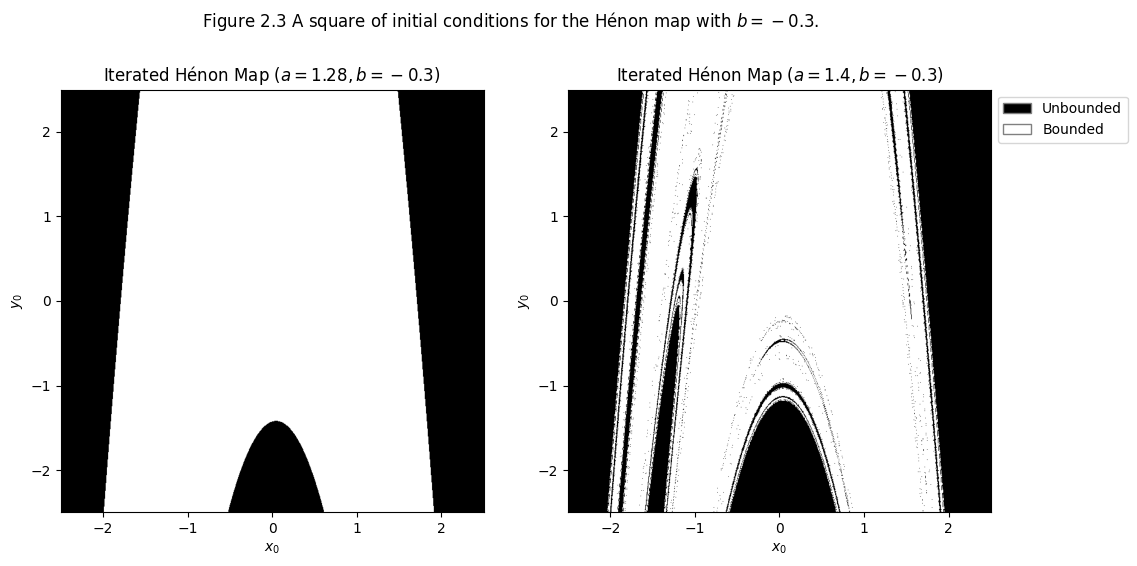

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First plot
ax = axs[0]
ax.imshow(Z0, origin='lower', cmap='gray_r', extent=[x.min(), x.max(), y.min(), y.max()])
ax.set_facecolor('black') # black background
ax.set_xlabel('$x_0$')
ax.set_ylabel('$y_0$')
ax.set_title('Iterated Hénon Map ($a=1.28, b=-0.3$)')

# Second plot
ax = axs[1]
ax.imshow(Z1, origin='lower', cmap='gray_r', extent=[x.min(), x.max(), y.min(), y.max()])
ax.set_facecolor('black') # black background
ax.set_xlabel('$x_0$')
ax.set_ylabel('$y_0$')
ax.set_title('Iterated Hénon Map ($a=1.4, b=-0.3$)')

# legend
unbounded_patch = mpatches.Patch(facecolor='black', label='Unbounded', edgecolor='gray')
bounded_patch = mpatches.Patch(facecolor='white', label='Bounded', edgecolor='gray')
leg = ax.legend(handles=[unbounded_patch, bounded_patch], loc='upper left', bbox_to_anchor=(1, 1))

# figure title
fig.suptitle('Figure 2.3 A square of initial conditions for the Hénon map with $b = -0.3$.')

plt.show()